<a href="https://colab.research.google.com/github/vankhoa21991/cyberlab/blob/main/tutorial/week1_linear/theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import random
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.3.0


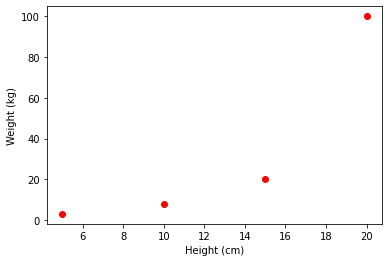

In [5]:

# Visualize data 
plt.plot(X, y, 'ro')
# plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

A =  [[  4.  50.]
 [ 50. 750.]]
b =  [[ 131.]
 [2395.]]
w =  [[-43.  ]
 [  6.06]]


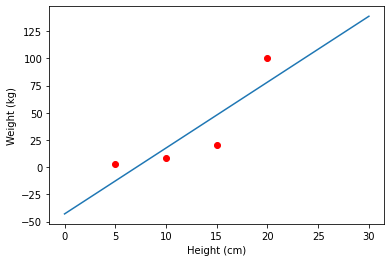

In [9]:
# diện tích (m2)
X = np.array([[5, 10, 15, 20]]).T
# giá (tỷ VND)
y = np.array([[ 3, 8 , 20, 100]]).T

# Xây dựng Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # thêm w0 vào X

# tính toán w dựa trên công thức
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('A = ', A)
print('b = ', b)
print('w = ', w)

# tính toán đường thẳng dựa trên w
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 30, 2)
y0 = w_0 + w_1*x0

# Vẽ dữ liệu và đường thẳng tìm được 
plt.plot(X.T, y.T, 'ro')       # data 
plt.plot(x0, y0)               # the fitting line
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Tensorflow cơ bản

## Tensor

In [2]:
# Tạo một tensor có rank = 0
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [3]:
# Tạo một tensor có rank = 1
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [4]:
# Tạo một tensor có rank = 2
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [5]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


## Indexing

In [6]:
## Index and slicing
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [7]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


In [8]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


In [9]:
# Multi-axis indexing
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


In [10]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



In [11]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


## Thay đổi kích thước tensor

In [12]:
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [13]:
print(rank_3_tensor)
print(tf.reshape(rank_3_tensor, [-1]))
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)
tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)
tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


## Phép tính

In [14]:
# Cộng trừ nhân chia
a = tf.constant(2, dtype=tf.float32)
b = tf.constant(3, dtype=tf.float32)
c = tf.constant(5, dtype=tf.float32)

add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

print("add =", add)
print("sub =", sub)
print("mul =", mul)
print("div =", div)

add = tf.Tensor(5.0, shape=(), dtype=float32)
sub = tf.Tensor(-1.0, shape=(), dtype=float32)
mul = tf.Tensor(6.0, shape=(), dtype=float32)
div = tf.Tensor(0.6666667, shape=(), dtype=float32)


In [15]:
# Tính tổng và trung bình
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])
max = tf.reduce_max([a, b, c])
# Access tensors value.
print("mean =", mean)
print("sum =", sum)
print("max =", max)

mean = tf.Tensor(3.3333333, shape=(), dtype=float32)
sum = tf.Tensor(10.0, shape=(), dtype=float32)
max = tf.Tensor(5.0, shape=(), dtype=float32)


In [16]:
d = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Tìm index của phần tử lớn nhất
print(tf.math.argmax(d))
# Tính softmax
print(tf.nn.softmax(d))

tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


In [17]:
# Chuyển list thành tensor
print(tf.convert_to_tensor([1,2,3]))
print(tf.convert_to_tensor(np.array([[1,2,3],[4,5,6]])))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [18]:
# Nhân 2 ma trận
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)
print("product =", product)

product = tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [19]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
z = tf.constant(2)
f = x*x*y + y + z
print(x)
print(y)
print(z)
print(f)

<tf.Variable 'x:0' shape=() dtype=int32, numpy=3>
<tf.Variable 'y:0' shape=() dtype=int32, numpy=4>
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(42, shape=(), dtype=int32)


In [20]:
f = tf.add(tf.add(tf.multiply(tf.multiply(x,x), y), y), 2)
print(f)

tf.Tensor(42, shape=(), dtype=int32)


## Broadcasting

In [21]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [22]:
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [23]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


## Biến

In [56]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


In [57]:
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
  # Element-wise multiply
  k = a * b

print(k)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


## Đạo hàm

In [24]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

In [25]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [51]:
w = tf.Variable(tf.ones([3,2]), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]
print(x, w, b)

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)
  print(loss)

[[1.0, 2.0, 3.0]] <tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)> <tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
tf.Tensor(36.0, shape=(), dtype=float32)


In [52]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [53]:
my_vars = {
    'w': w,
    'b': b
}

grad = tape.gradient(loss, my_vars)
grad

{'w': <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 6.,  6.],
        [12., 12.],
        [18., 18.]], dtype=float32)>,
 'b': <tf.Tensor: shape=(2,), dtype=float32, numpy=array([6., 6.], dtype=float32)>}

In [54]:
fixed_kernel = tf.ones([3,2])

layer = tf.keras.layers.Dense(2, use_bias=False, 
                kernel_initializer=tf.keras.initializers.Constant(fixed_kernel))
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

print(loss)
# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)
print(grad)
for var, g in zip(layer.trainable_variables, grad):
  print(f'{var.name}, shape: {g.shape}')

tf.Tensor(36.0, shape=(), dtype=float32)
[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 6.,  6.],
       [12., 12.],
       [18., 18.]], dtype=float32)>]
dense_7/kernel:0, shape: (3, 2)


## Modules, layer và model

In [ ]:
https://www.tensorflow.org/guide/intro_to_modules

# Linear regression với tensorflow

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


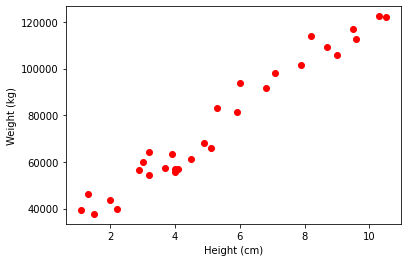

In [20]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
Y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

df = pd.read_csv('Salary.csv')
 
X = df.iloc[:,0]
Y = df.iloc[:,1]

X= np.expand_dims(X, axis=0).T
Y= np.expand_dims(Y, axis=0).T
print(X, Y)
# Visualize data 
plt.plot(X, Y, 'ro')
# plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [21]:
def plot(x, y):
  plt.scatter(X,Y, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.legend()

## Sử dụng sklearn

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
reg = LinearRegression()
reg.fit(X, Y)

# print the model coefficients
print('Coefficients:', reg.coef_)
print('Bias:', reg.intercept_)

Coefficients: [[9449.96232146]]
Bias: [25792.20019867]


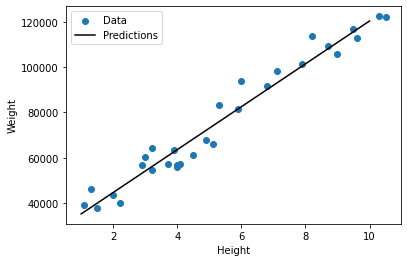

In [88]:
x = tf.linspace(1, 10, 11)
x = tf.transpose(tf.expand_dims(x, axis=0))
y_pred = reg.predict(x)
plot(x, y_pred)

## Sử dụng tensorflow-keras

In [98]:
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.predict(X)

1/1 [==============================] - 0s 74ms/step


array([[0.59933  ],
       [0.7082991],
       [0.8172682],
       [1.0896909],
       [1.19866  ],
       [1.5800519],
       [1.6345364],
       [1.7435055],
       [1.7435055],
       [2.0159283],
       [2.1248972],
       [2.1793818],
       [2.1793818],
       [2.2338665],
       [2.4518046],
       [2.6697428],
       [2.7787118],
       [2.887681 ],
       [3.2145882],
       [3.2690728],
       [3.7049491],
       [3.8684027],
       [4.3042793],
       [4.467733 ],
       [4.740155 ],
       [4.9036093],
       [5.176032 ],
       [5.2305164],
       [5.6119084],
       [5.720877 ]], dtype=float32)

In [101]:
history = model.fit(
    X,
    Y,
    epochs=500,
    verbose=0,
    # Calculate validation results on 20% of the training data.
   )

In [102]:
weights, bias = model.get_weights()
print('Coefficients:', weights)
print('Bias:', bias[0])

Coefficients: [[9456.093]]
Bias: 25750.889


In [103]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
495,31271336.0,495
496,31271328.0,496
497,31271330.0,497
498,31271332.0,498
499,31271328.0,499


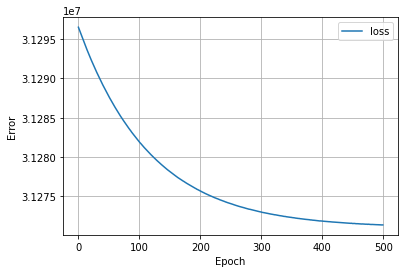

In [105]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [106]:
y_pred = model.predict(X)
y_pred

1/1 [==============================] - 0s 30ms/step


array([[ 36152.59 ],
       [ 38043.81 ],
       [ 39935.027],
       [ 44663.074],
       [ 46554.293],
       [ 53173.56 ],
       [ 54119.164],
       [ 56010.387],
       [ 56010.387],
       [ 60738.43 ],
       [ 62629.65 ],
       [ 63575.258],
       [ 63575.258],
       [ 64520.867],
       [ 68303.305],
       [ 72085.74 ],
       [ 73976.96 ],
       [ 75868.18 ],
       [ 81541.836],
       [ 82487.445],
       [ 90052.32 ],
       [ 92889.15 ],
       [100454.02 ],
       [103290.85 ],
       [108018.9  ],
       [110855.73 ],
       [115583.77 ],
       [116529.38 ],
       [123148.65 ],
       [125039.87 ]], dtype=float32)

1/1 [==============================] - 0s 51ms/step


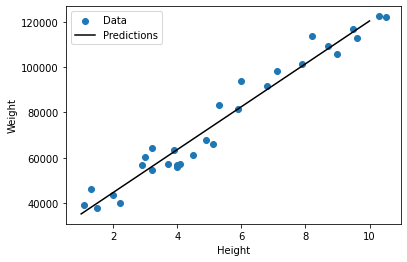

In [107]:
x = tf.transpose(tf.linspace(1, 10, 11))
y_pred = model.predict(x)
plot(x, y_pred)

## Sử dụng tensorflow grad

In [22]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [23]:
import numpy as np
rng = np.random

# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [24]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [25]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 111846928.000000, W: 12314.898438, b: 6486.152344
step: 100, loss: 84004680.000000, W: 11767.658203, b: 10173.858398
step: 150, loss: 65783084.000000, W: 11324.948242, b: 13157.164062
step: 200, loss: 53857764.000000, W: 10966.801758, b: 15570.621094
step: 250, loss: 46053128.000000, W: 10677.066406, b: 17523.070312
step: 300, loss: 40945280.000000, W: 10442.672852, b: 19102.583984
step: 350, loss: 37602424.000000, W: 10253.052734, b: 20380.388672
step: 400, loss: 35414640.000000, W: 10099.651367, b: 21414.117188
step: 450, loss: 33982828.000000, W: 9975.551758, b: 22250.392578
step: 500, loss: 33045748.000000, W: 9875.157227, b: 22926.925781
step: 550, loss: 32432490.000000, W: 9793.939453, b: 23474.232422
step: 600, loss: 32031134.000000, W: 9728.234375, b: 23916.996094
step: 650, loss: 31768456.000000, W: 9675.081055, b: 24275.185547
step: 700, loss: 31596546.000000, W: 9632.080078, b: 24564.953125
step: 750, loss: 31484042.000000, W: 9597.292969, b: 24799.378906
ste

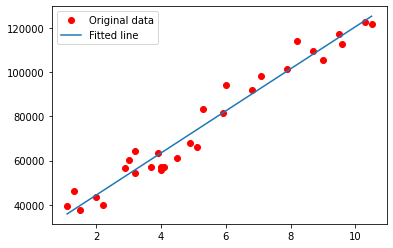

In [26]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

# Linear regression với pytorch

In [ ]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [ ]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.3369, -0.4857]) 
label: tensor([3.1712])


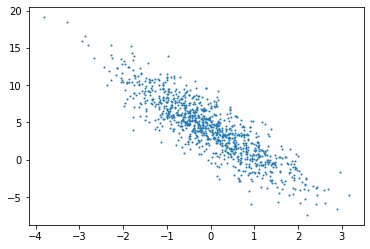

In [ ]:
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1);

## Solve with gradient descent

In [ ]:
# dataloader
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2241,  0.5666],
        [ 0.5130,  0.1888],
        [-0.6608, -0.1084],
        [-0.6809, -0.5367],
        [ 0.4570, -0.5945],
        [-1.0138, -0.6711],
        [ 1.0391,  0.0913],
        [ 0.2555, -0.1703],
        [ 0.2779, -0.5333],
        [-0.5160,  0.3799]]) 
 tensor([[1.8314],
        [4.5896],
        [3.2387],
        [4.6824],
        [7.1537],
        [4.4493],
        [5.9593],
        [5.2822],
        [6.5593],
        [1.8758]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [ ]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        out = net(X, w, b)
        l = loss(out, y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034239
epoch 2, loss 0.000129
epoch 3, loss 0.000051


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0002, -0.0005], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0008], grad_fn=<RsubBackward1>)
